In [51]:
import pandas as pd

In [92]:
# -*- coding:utf-8 -*-
import json

# JSON 中的乱码字符串
json_str = '{"name": "\\u4e2d\\u6587"}'

# 将 JSON 中的乱码字符串解码为 Unicode 码点
unicode_str = json.loads(json_str)

# 将 Unicode 码点编码为 UTF-8 字符串
utf8_str = json.dumps(unicode_str, ensure_ascii=False).encode('utf8')

print(utf8_str)

b'{"name": "\xe4\xb8\xad\xe6\x96\x87"}'


In [111]:
import json

# JSON 中的乱码字符串
json_str = '{"name": "三公仔 小儿七星茶颗粒 7g*10袋/盒 7盒装 免运费】19.8元/盒"}'       

# 将 JSON 中的乱码字符串解码为 Unicode 码点
unicode_str = json.loads(json_str)

# 将 Unicode 码点编码为 UTF-8 字符串
utf8_str2 = json.dumps(unicode_str, ensure_ascii=False).encode('utf8')

print(utf8_str)

b'{"name": "\xe4\xb8\x89\xe5\x85\xac\xe4\xbb\x94 \xe5\xb0\x8f\xe5\x84\xbf\xe4\xb8\x83\xe6\x98\x9f\xe8\x8c\xb6\xe9\xa2\x97\xe7\xb2\x92 7g*10\xe8\xa2\x8b/\xe7\x9b\x92 7\xe7\x9b\x92\xe8\xa3\x85 \xe5\x85\x8d\xe8\xbf\x90\xe8\xb4\xb9\xe3\x80\x9119.8\xe5\x85\x83/\xe7\x9b\x92"}'


In [113]:
# -*- coding:utf-8 -*-
chinese_text = utf8_str.decode('utf8')
chinese_text

'{"name": "三公仔 小儿七星茶颗粒 7g*10袋/盒 7盒装 免运费】19.8元/盒"}'

In [ ]:
https://github.com/AnnetteChiu/airport/blob/main/med.rtf

In [125]:
url = 'https://raw.githubusercontent.com/AnnetteChiu/airport/main/med.rtf'
df = pd.read_csv(url)

# Display the first 10 rows of the DataFrame
df

,{\rtf1\ansi\ansicpg950\cocoartf2759
0,\cocoatextscaling0\cocoaplatform0{\fonttbl\f0\...
1,{\colortbl;\red255\green255\blue255;}
2,{\*\expandedcolortbl;;}
3,\paperw11900\paperh16840\margl1440\margr1440\v...
4,\pard\tx720\tx1440\tx2160\tx2880\tx3600\tx4320...
...,...
668,\uc0\u34562 \u34593 \u65306 \u35299 \u27602 \u...
669,\uc0\u38463 \u39759 \u65306 \u28040 \u31215 \u...
670,\uc0\u26623 \u33922 \u65306 \u38477 \u36870 \u...
671,\uc0\u30738 \u30707 \u65306 \u22806 \u29992 \u...


In [127]:
# -*- coding:utf-8 -*-
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time
import operator
from colorama import Fore, init
import plotly.express as px

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/a7bc1bbb-711a-45af-86cc-
[nltk_data]     830a1f00c022/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/a7bc1bbb-711a-45af-86cc-
[nltk_data]     830a1f00c022/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/a7bc1bbb-711a-45af-86cc-
[nltk_data]     830a1f00c022/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/a7bc1bbb-711a-45af-86cc-
[nltk_data]     830a1f00c022/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<Axes: >

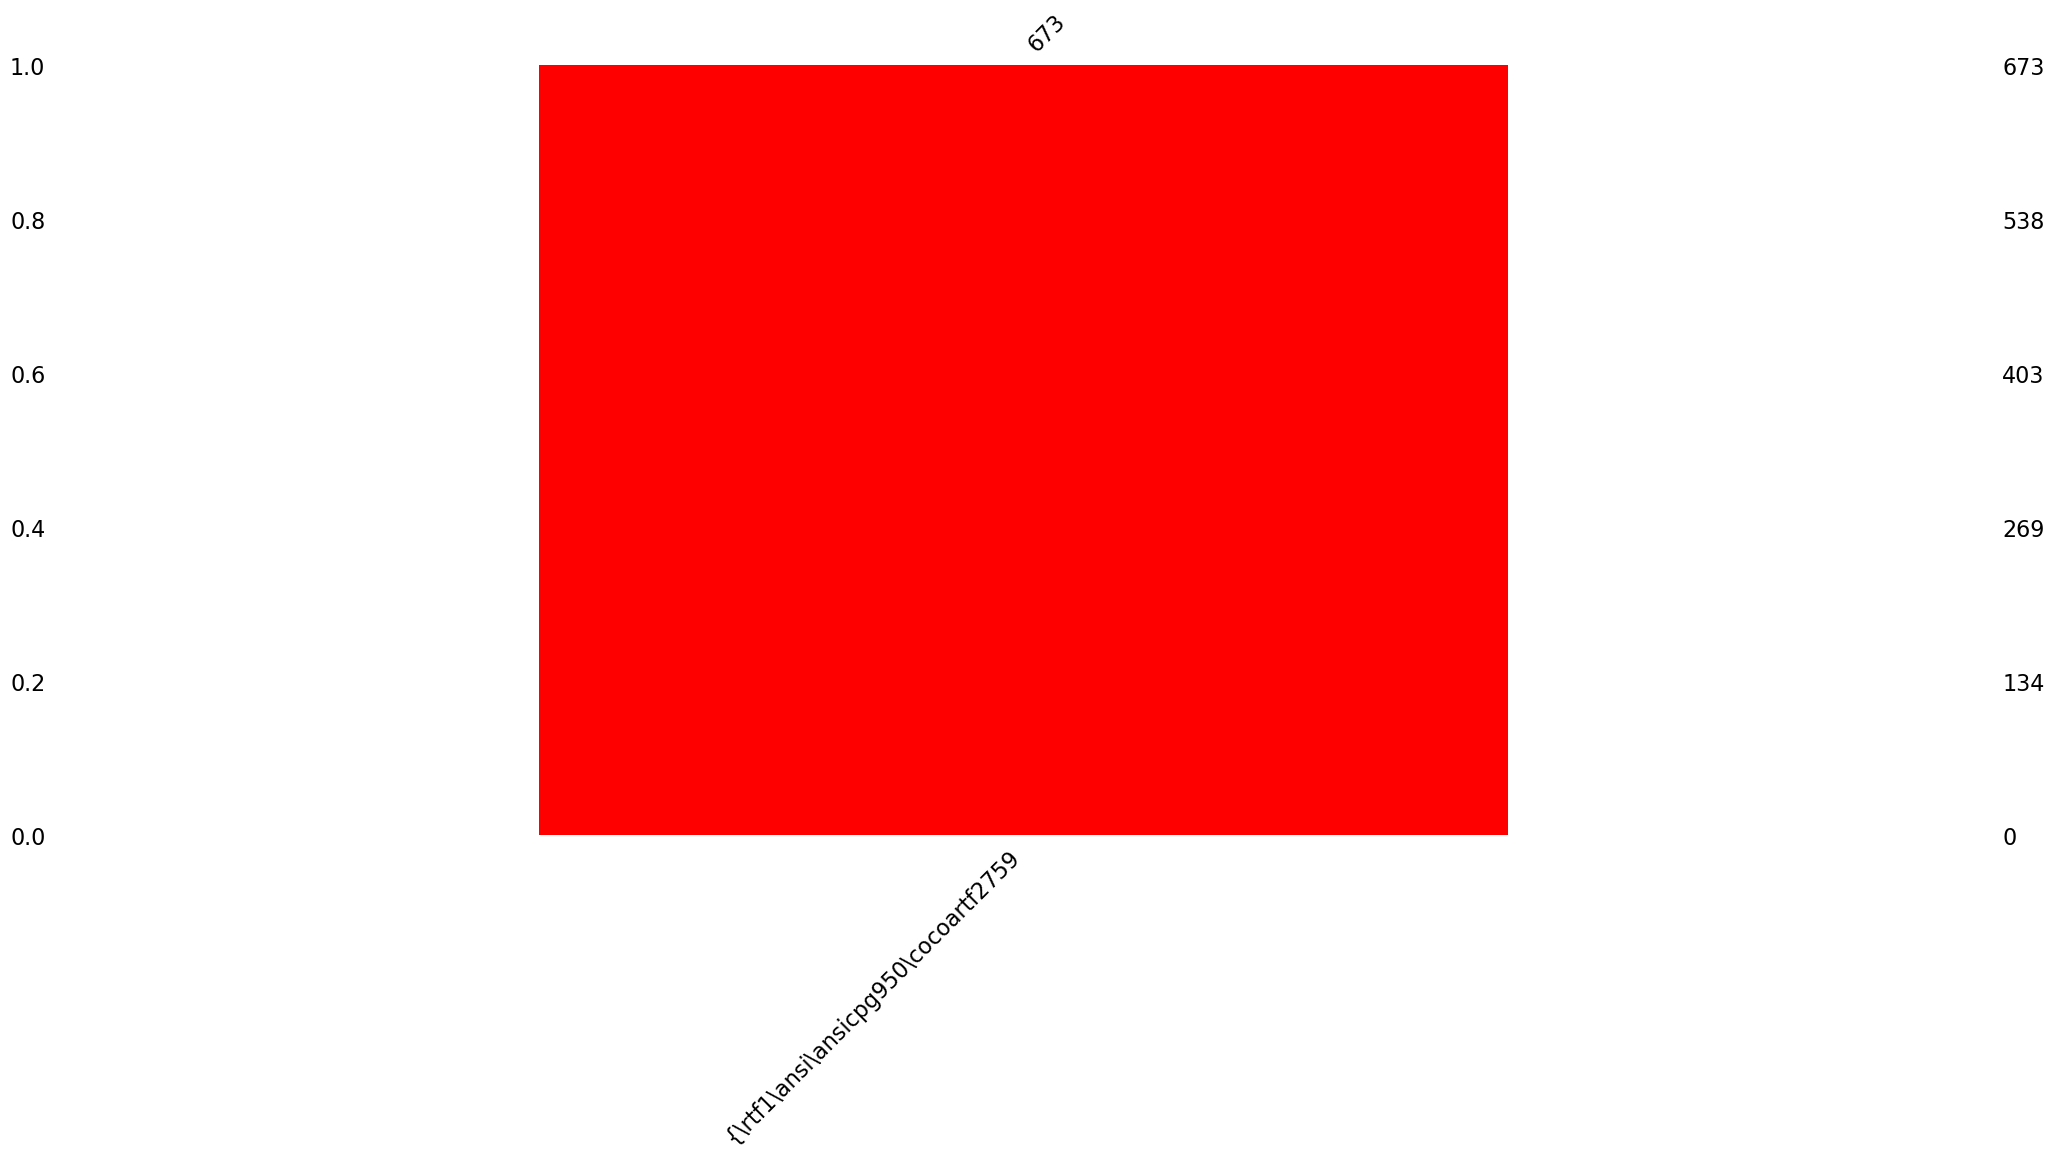

In [128]:
msno.bar(df, color = 'r')

In [129]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='turbo',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,{\rtf1\ansi\ansicpg950\cocoartf2759,object,0,0.000000


In [130]:
df.columns

Index(['{\rtf1\ansi\ansicpg950\cocoartf2759'], dtype='object')

In [151]:
df.columns = ['review']
df.columns

Index(['review'], dtype='object')

In [158]:
specified_columns = ['review']

for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n') 

Total unique values for review: 613
\: 34
\uc0\u23665 \u26946 \u21494 \u65306 \u27963 \u34880 \u21270 \u30208 \u65292 \u29702 \u27668 \u36890 \u33033 \u65292 \u21270 \u27978 \u38477 \u33026 \u12290 \: 2
\uc0\u32418 \u33457 \u40857 \u32966 \u65306 \u28165 \u28909 \u38500 \u28287 \u65292 \u35299 \u27602 \u65292 \u27490 \u21683 \u12290 \: 2
\uc0\u40857 \u32966 \u65306 \u28165 \u28909 \u29157 \u28287 \u65292 \u27899 \u32925 \u32966 \u28779 \u12290 \: 2
\uc0\u35895 \u31934 \u33609 \u65306 \u30095 \u25955 \u39118 \u28909 \u65292 \u26126 \u30446 \u36864 \u32755 \u12290 \: 2
\uc0\u31070 \u26354 \u65306 \u28040 \u39135 \u21270 \u31215 \: 2
\uc0\u26408 \u34676 \u34678 \u65306 \u28165 \u32954 \u21033 \u21693 \u65292 \u30095 \u32925 \u21644 \u32963 \u12290 \: 2
\uc0\u29572 \u21442 \u65306 \u28165 \u28909 \u20937 \u34880 \u65292 \u28363 \u38452 \u38477 \u28779 \u65292 \u35299 \u27602 \u25955 \u32467 \u12290 \: 2
\uc0\u24191 \u37329 \u38065 \u33609 \u65306 \u21033 \u23615 \u36890 \u28107 \u65292 \u2

In [159]:
df2 = df.copy()

In [160]:
df2.head(2)

,review,clean_reviews
0,\cocoatextscaling0\cocoaplatform0{\fonttbl\f0\...,cocoatextscalingcocoaplatformfonttblffswissfch...
1,{\colortbl;\red255\green255\blue255;},colortblredgreenblue


In [164]:
df2['temp_list'] = df2['review'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df2['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')

,Common_words,count
0,\u65292,1057
1,\,667
2,\u65306,633
3,\u12290,622
4,\u27490,349
5,\u34880,244
6,\u28165,213
7,\u28909,197
8,\u35299,193
9,\u28040,172


In [175]:
df3 = top_words_df.copy()

In [176]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Common_words  20 non-null     object
 1   count         20 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 452.0+ bytes


In [178]:
df3 = df3[["Common_words","count"]]
df3.head(20)

,Common_words,count
0,\u65292,1057
1,\,667
2,\u65306,633
3,\u12290,622
4,\u27490,349
5,\u34880,244
6,\u28165,213
7,\u28909,197
8,\u35299,193
9,\u28040,172


In [185]:
analyzer = SentimentIntensityAnalyzer()

df3['sentiment_score'] = df3['Common_words'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df3['sentiment'] = df3['count'].apply(lambda score: 'positive' if score >= 600 else ('negative' if score <= 200 else 'neutral'))

print(df3[['Common_words', 'count', 'sentiment']].head(19))

   Common_words  count sentiment
0       \u65292   1057  positive
1             \    667  positive
2       \u65306    633  positive
3       \u12290    622  positive
4       \u27490    349   neutral
5       \u34880    244   neutral
6       \u28165    213   neutral
7       \u28909    197  negative
8       \u35299    193  negative
9       \u28040    172  negative
10      \u27602    169  negative
11      \u21033    144  negative
12      \u28287    140  negative
13      \u30171    138  negative
14      \u36890    128  negative
15      \u25955    122  negative
16      \u31067    118  negative
17      \u27668    116  negative
18      \u39118    113  negative


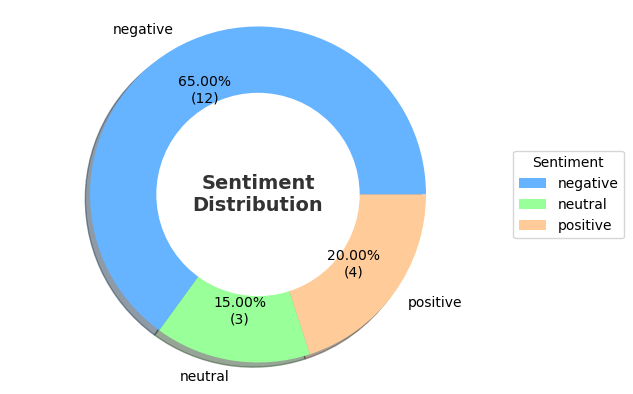

In [186]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.0, 0, 0)  

sentiment_counts = df3.groupby("sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts, 
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})', 
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="black"),  
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')  

plt.show()